## Alternate Hypothesis: The yearly total precipitation correlates with soil moisture levels in Corpus Christi

## Null Hypothesis (H0): The yearly total precipitation does not correlate with soil moisture levels in Corpus Christi

    
**Data obtained from https://climate.northwestknowledge.net/NWTOOLBOX/formattedDownloads.php**

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

In [8]:
#monthly soil moisture and precipitation from 1958-2023
df = pd.read_csv("soilM_.precip_maxTemp_CorpusChristi.csv",header=0, parse_dates=True, skiprows= 10)
#precip_xr = xr.open_dataset("precip.mon.mean.nc")

In [9]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str), format='%Y%m')

In [10]:
df.set_index('Date', inplace=True)

In [11]:
df.head()

,Year,Month,soil(in),ppt(in),tmax(degF)
Date,,,,,
1958-01-01,1958,1,8.62,3.31,39.27
1958-02-01,1958,2,8.62,3.40,47.35
1958-03-01,1958,3,8.49,1.64,47.64
1958-04-01,1958,4,8.62,4.40,53.98
1958-05-01,1958,5,5.73,0.71,74.68


**Let's have a graphical idea of the relationship between both variables**w

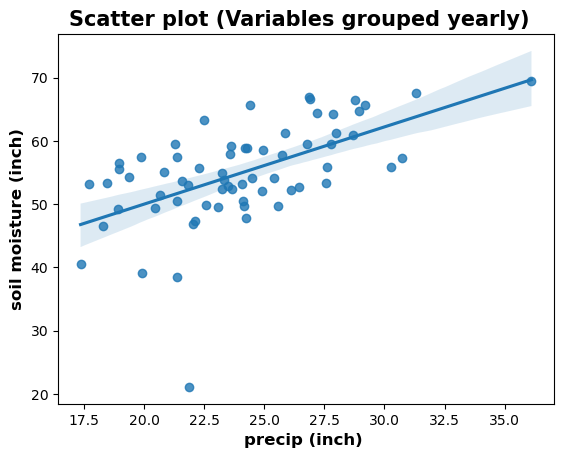

In [12]:
yearly_p_s = df[['ppt(in)','soil(in)']].groupby(pd.Grouper(freq='A')).sum()
sns.regplot(data =yearly_p_s , x = 'ppt(in)', y ='soil(in)')
plt.title('Scatter plot (Variables grouped yearly)  ', weight='bold', fontsize = 15)
plt.ylabel('soil moisture (inch)', weight='bold', fontsize = 12)
plt.xlabel('precip (inch) ', weight='bold', fontsize = 12)
plt.show()

**The positive slope of the regression line indicates that there is a positive relationship between precipitation and soil moisture; as precipitation increases, the soil moisture also tends to increase. The distribution of points suggests some variability around the regression line, which is expected in real-world data.**

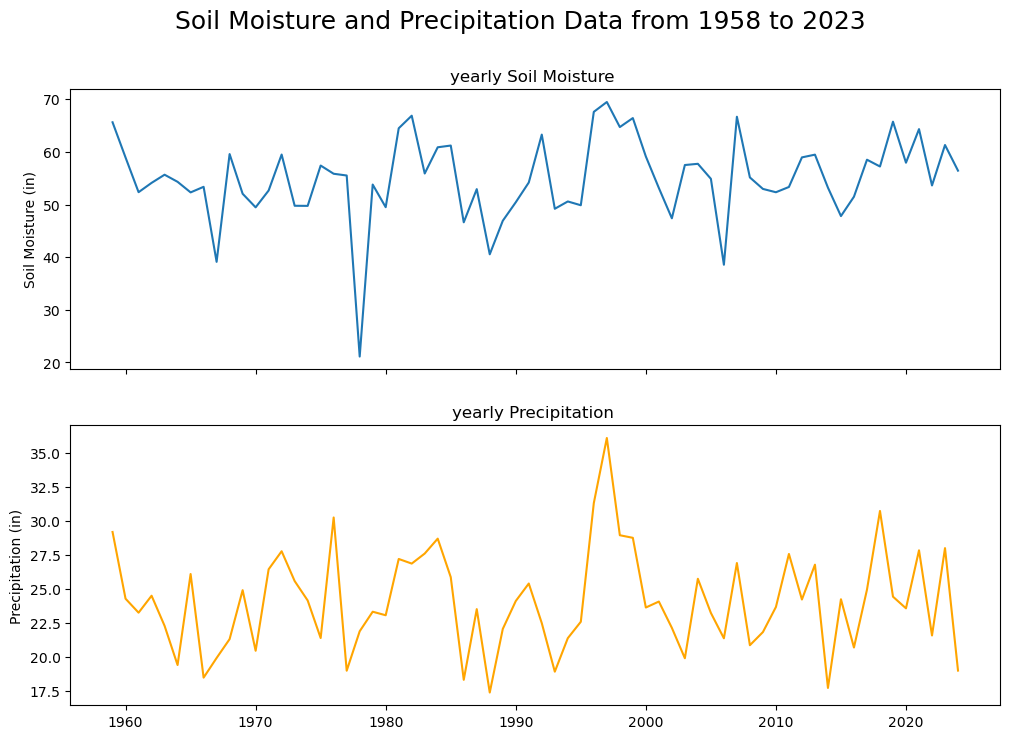

In [13]:


# Creating a figure and a grid of subplots with shared x-axis
fig, axes = plt.subplots(2, 1, figsize=(12, 8), dpi=100, sharex=True)

# Soil moisture subplot
axes[0].plot(yearly_p_s.index, yearly_p_s['soil(in)'], label='Soil Moisture')
axes[0].set_ylabel('Soil Moisture (in)')
axes[0].set_title('yearly Soil Moisture ')

# Precipitation subplot
axes[1].plot(yearly_p_s.index, yearly_p_s['ppt(in)'], color='orange', label='Precipitation')
axes[1].set_ylabel('Precipitation (in)')
axes[1].set_title('yearly Precipitation ')

# Setting the x-axis major formatter to display years
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.suptitle('Soil Moisture and Precipitation Data from 1958 to 2023', fontsize=18)
plt.show()



**The correlation between both varibles is not exactly clear from the above graph. We shall proceed with out discoveries**

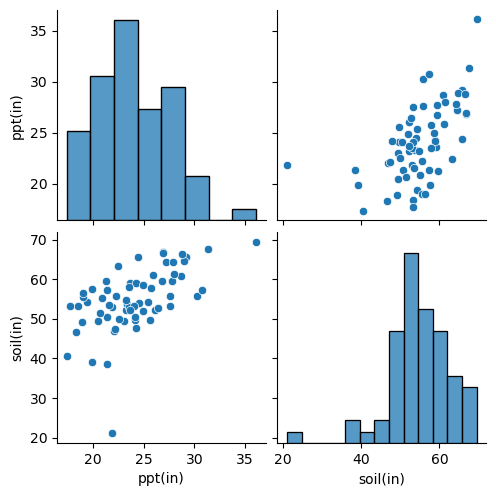

In [14]:
sns.pairplot(yearly_p_s)
plt.show()

In [15]:
#to test for linear correlation.
#calculating pearson's coeeficient between soilmoisture and precip.
r, p_val = pearsonr(yearly_p_s['soil(in)'], yearly_p_s['ppt(in)'])

In [16]:
print(f" Correlation : {r} , Pvalue: {p_val}")

 Correlation : 0.5714359961163377 , Pvalue: 5.413903704934011e-07


**Correlation (r): The Pearson's correlation coefficient is approximately  0.571.This suggests a moderate positive linear relationship between yearly total precipitation and soil moisture levels in Corpus Christi. This means as precipitation increases, soil moisture also tends to increase to some extent.**

**P-value: The p-value is approximately 5.41×10−7 , which is significantly small. This indicates that the probability of observing such a correlation by chance (if there were actually no correlation in the population from which the sample was drawn) is extremely low. We reject the null hypothesis**

In [17]:
# Calculating Spearman (monotonic) correlation coefficient
spearman_correlation = yearly_p_s['ppt(in)'].corr(yearly_p_s['soil(in)'], method='spearman')

print(spearman_correlation)

0.5894374282433985


**A Spearman correlation coefficient of 0.589 suggests a moderate positive association between the yearly precipitaion and soilmoisture. This result suggests that years with more precipitation tend to also be years with higher soil moisture levels, but there are likely other factors influencing soil moisture as well, given that the correlation is not very close to 1.**

In [18]:

X = yearly_p_s['ppt(in)']  # Independent variable what im trying to predict
y = yearly_p_s['soil(in)']  # Dependent variable (response)

# Add a constant to the predictor variable set to represent the intercept
X = sm.add_constant(X)

# Create a model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Make predictions
yearly_p_s['predictions'] = results.predict(X)
# Print the summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               soil(in)   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     31.03
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           5.41e-07
Time:                        16:12:21   Log-Likelihood:                -216.30
No. Observations:                  66   AIC:                             436.6
Df Residuals:                      64   BIC:                             441.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6180      5.331      4.806      0.0

**The R-squared value is 0.327, which means that approximately 32.7% of the variability in soil moisture is explained by the model. This isn't very high, suggesting that precipitation alone does not fully explain the changes in soil moisture.**

**F-statistic and Prob (F-statistic): The F-statistic is 31.03 with a very small p-value (5.42×10−7), indicating that the model is statistically significant.**

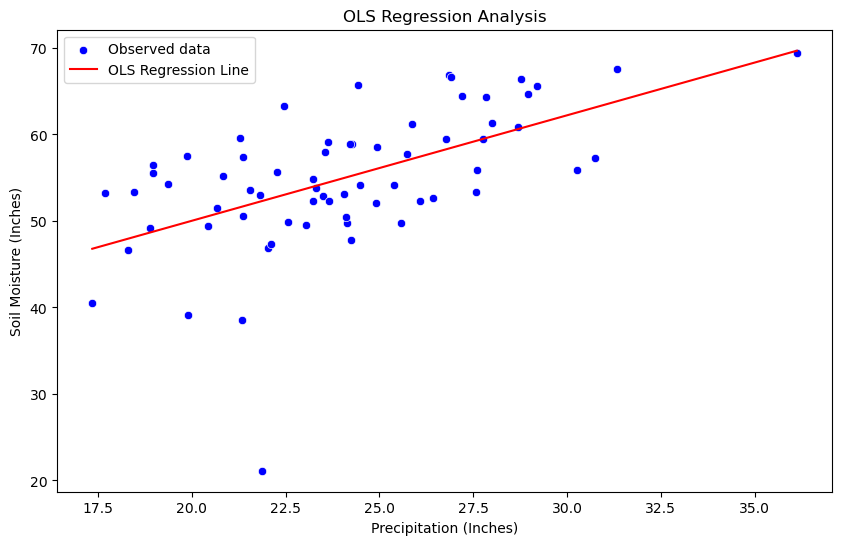

In [19]:
plt.figure(figsize=(10, 6))

# Scatter plot of observed data
sns.scatterplot(x='ppt(in)', y='soil(in)', data=yearly_p_s, color='blue', label='Observed data')

# Line plot for the regression line
sns.lineplot(x='ppt(in)', y='predictions', data=yearly_p_s, color='red', label='OLS Regression Line')

plt.title('OLS Regression Analysis')
plt.xlabel('Precipitation (Inches)')
plt.ylabel('Soil Moisture (Inches)')
plt.legend()
plt.show()

**The positive slope of the regression line indicates that there is a positive relationship between precipitation and soil moisture; as precipitation increases, the soil moisture also tends to increase. The distribution of points suggests some variability around the regression line, which is expected in real-world data.**

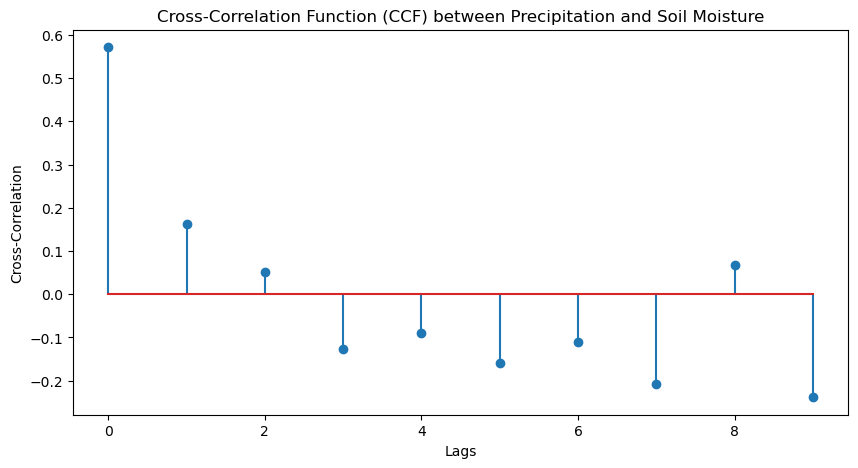

In [20]:

import statsmodels.tsa.stattools as smt


# Calculate Cross-Correlation Function (CCF) between 'ppt(in)' and 'soil(in)'
max_lags = 10
ccf_results = smt.ccf(yearly_p_s['ppt(in)'], yearly_p_s['soil(in)'], adjusted=False)[:max_lags]

plt.figure(figsize=(10, 5))
plt.stem(range(max_lags), ccf_results, use_line_collection=True)
plt.xlabel('Lags')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Function (CCF) between Precipitation and Soil Moisture')
plt.show()


**Lag 0: At lag 0, the correlation is at its highest point on the plot, indicating that there's a strong positive correlation when the two series are aligned with no lag. This suggests that there's a contemporaneous relationship between precipitation and soil moisture—when precipitation is high (or low), soil moisture is also high (or low) at the same time.**

**Lags 1-9: As the lag increases, the correlation values fluctuate above and below zero but are generally lower than at lag 0. The positive values indicate a positive correlation at those lags, meaning that past values of one variable are positively associated with future values of the other variable.**

**Negative Correlations: Some lags have negative correlation values,**

In [25]:
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Paired T-test
t_stat, p_val = stats.ttest_rel(yearly_p_s['ppt(in)'], yearly_p_s['soil(in)'])

print(t_stat, p_val)

-38.55435612751584 1.67353869595877e-46


**NOTE: This test does not directly test for correlation**
**T-statistic: The negative value of the t-statistic suggests that precipitation has a lower mean than soil mositure when paired by their respective observations.**

**P-value: The p-value is a measure of the probability that the observed result, or one more extreme, would occur under the null hypothesis. A p-value of 
1.008×10−138  is extremely small, far below the significance level  indicating that the result is statistically significant.**

In [26]:
# Z-Test
z_stat, p_z_val = ztest(yearly_p_s['ppt(in)'], yearly_p_s['soil(in)'])
print(z_stat, p_z_val)

-28.87639365091146 2.363173463901814e-183


**NOTE: The Z does not directly test for correlation either**

In [28]:
#grangercausalitytest: used to see if meaning one variable's past values are used to predict
#another variable's future values
from statsmodels.tsa.stattools import grangercausalitytests
maxlag = 12  # Or another appropriate lag based on your data
test_result = grangercausalitytests(df[['ppt(in)', 'soil(in)']], maxlag=maxlag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6990  , p=0.1928  , df_denom=788, df_num=1
ssr based chi2 test:   chi2=1.7054  , p=0.1916  , df=1
likelihood ratio test: chi2=1.7036  , p=0.1918  , df=1
parameter F test:         F=1.6990  , p=0.1928  , df_denom=788, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=49.8693 , p=0.0000  , df_denom=785, df_num=2
ssr based chi2 test:   chi2=100.3739, p=0.0000  , df=2
likelihood ratio test: chi2=94.4907 , p=0.0000  , df=2
parameter F test:         F=49.8693 , p=0.0000  , df_denom=785, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=41.6577 , p=0.0000  , df_denom=782, df_num=3
ssr based chi2 test:   chi2=126.0919, p=0.0000  , df=3
likelihood ratio test: chi2=116.9757, p=0.0000  , df=3
parameter F test:         F=41.6577 , p=0.0000  , df_denom=782, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=34.1247 , p=0.0000  

**For Lag 1: The lack of statistical significance (p-values above 0.05) indicates that, at a one-month lag, there is no evidence to suggest that past values of precipitation significantly predict the future values of soil moisture levels. This result does not provide enough evidence to reject the null hypothesis at lag 1.**

**For Lags 2 to 12: The significant results (p-values near zero) from lags 2 through 12 strongly suggest that past values of total yearly precipitation (considering lags of 2 months and beyond) do have a predictive relationship with future soil moisture levels. This is a clear indication to reject the null hypothesis in favor of the alternative hypothesis for these lags. The evidence shows that the relationship between precipitation and soil moisture becomes apparent only when considering the influence of precipitation from two months prior or more on future soil moisture levels.**

**Immediate vs. Delayed Effects: The absence of significance at lag 1 suggests that the immediate past month's precipitation doesn't significantly influence the next month's soil moisture. However, starting from lag 2 and onward, significant results indicate a delayed effect where precipitation influences soil moisture in the following months.**
**Seasonal Considerations: The significance at lags 2 through 12 underscores the potential seasonal dynamics between precipitation and soil moisture. Precipitation in a particular month could have lasting effects on soil moisture that are observable throughout the year, reflecting the delayed absorption, groundwater recharge, and evapotranspiration effects.**

In [37]:

'''ANOVA table to test the significance of the ols model from statsmodels'''

# Regression Analysis
X = yearly_p_s['ppt(in)']  # Predictor
y = yearly_p_s['soil(in)']  # Response variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
est = sm.OLS(y, X).fit()
# ANOVA

anova_results = ols('Q("soil(in)") ~ C(Q("ppt(in)"))', data=df).fit()

anova_table = sm.stats.anova_lm(anova_results, typ=2)

print(anova_table)


                      sum_sq     df         F    PR(>F)
C(Q("ppt(in)"))  3009.190464  373.0  1.458595  0.000089
Residual         2311.970398  418.0       NaN       NaN


**Sum of Squares: For C(Q("ppt(in)")): 3009.190464. This is the sum of squared deviations of the group means from the overall mean, indicating the variance explained by the model.
For Residual: 2311.970398. This is the sum of squared deviations of observations from their group means, indicating the variance not explained by the model.**

**The F-statistic and its associated p-value suggest that there are statistically significant differences in the means of the dependent variable across different groups or levels of ppt(in). This implies that ppt(in) has a significant effect on soil moisture.**

**Given the very low p-value (0.000089), we have strong evidence against the null hypothesis of no effect, indicating that changes in ppt(in) are associated with changes in the soil moisture.**

**The substantial sums of squares for both the model (C(Q("ppt(in)"))) and the residuals indicate that while a significant portion of variance is explained by differences in ppt(in), a considerable amount of variance remains unexplained by this model alone.**

## Based on all the above analysis, we reject the null hypothesis